# Visualization and Regression

Now that you have completed the Python tutorial, you are now ready to learn about how to visualize data and how to analyze data with regression. To begin, run the cells below to install and import the required packages we will be using for this tutorial.



In [ ]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install matplotlib

In [32]:
%matplotlib inline
import numpy as np 
import pandas as pd
import sklearn as sk 
import matplotlib.pyplot as plt

We will be using the US unemployment data from https://fred.stlouisfed.org/ show what we can do with data. Let's start by importing the .csv file data with pandas. The statement below will put the csv file into a pandas DataFrame, a data structure for holding tabular (2D) data.

In [43]:
unemployment_data = pd.read_csv("data/unemployment.csv")
unemployment_data

,date,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,housing_price_index
0,11/1/10,16.9,8696.0,2531.0,6708.0,5.7,63.0,186.07
1,12/1/10,16.6,8549.0,2609.0,6899.0,6.4,61.2,183.27
2,1/1/11,16.2,8393.0,2800.0,6816.0,6.5,60.1,181.35
3,2/1/11,16.0,8175.0,2730.0,6741.0,6.4,60.2,179.66
4,3/1/11,15.9,8166.0,2434.0,6735.0,6.4,60.3,178.84
5,4/1/11,16.1,8016.0,2466.0,6823.0,6.8,59.4,180.80
6,5/1/11,15.8,8205.0,2206.0,6880.0,6.6,60.0,182.11
7,6/1/11,16.1,8143.0,2680.0,6946.0,7.0,58.8,183.85
8,7/1/11,15.9,8177.0,2785.0,6850.0,6.8,59.2,184.25
9,8/1/11,16.1,8247.0,2575.0,6940.0,7.1,58.2,182.97


We can start visualizing the data that we have in the table. First, we convert the table into a numpy array. Let's extract the columns that we are interested in and plot them with pyplot. 

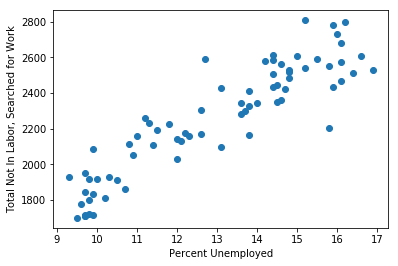

In [45]:
#once this cell is run, the "data" variable will store the table and can be accessed from any cell 
data = np.array(unemployment_data[:len(unemployment_data)-1])

#data[:, col_num] means take select all row values in that column number in numpy
total_unemployed = data[:, 1]
not_labor = data[:, 3]

#plot the data by inputting the x and y axis
plt.scatter(total_unemployed, not_labor)
plt.xlabel("Percent Unemployed")
plt.ylabel("Total Not In Labor, Searched for Work")
plt.show()


**Challenge:** Try plotting the total percent of people unemployed vs those unemployed for more than 15 weeks.

In [ ]:
total_unemployed = #INSERT CODE HERE
unemp_15_weeks = #INSERT CODE HERE

plt.scatter(total_unemployed, unemp_15_weeks)
plt.xlabel("Percent Unemployed")
plt.ylabel("Total Unemployed for > 15 Weeks")
plt.show()

Now that we know how to select and plot our data, we are ready to dive into regression. For our current task, let's use the total unemployed and housing price index columns.

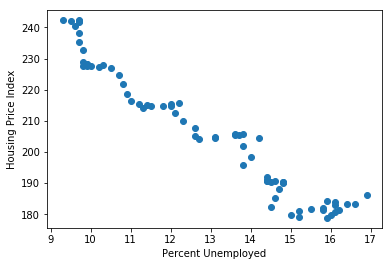

In [47]:
total_unemployed = data[:,1]
hpi = data[:,7]

plt.scatter(total_unemployed, hpi)
plt.xlabel("Percent Unemployed")
plt.ylabel("Housing Price Index")
plt.show()

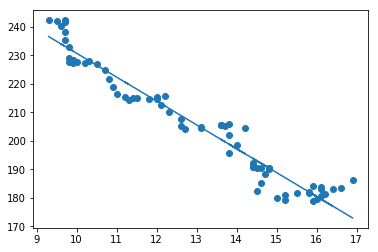

In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = np.reshape(total_unemployed, (73,1))
y = np.reshape(hpi, (73,1))

model.fit(x, hpi)
y_ = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_)
plt.show()